<div style="background-color: #90C376; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color: white; text-align: center; font-size:199%; margin: 0;">Fuel Efficiency Prediction and Analysis for Automotive Insights</h1>
  <span style="color: white;"></span>
</div>

<img src="https://github.com/bilalalam25/cars_image/blob/main/83b3100cebddb4274cd9af0a6730922d.jpg?raw=true" width="1800">

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;"> <h3 align="left"><span style="border-bottom: 3px solid #A66F2D; padding-bottom: 4px;"><font color=#591E1E>Problem:</font></span></h3>

  
In this project, we are dedicated to transform automotive company and to revolutionize the automotive sector through data-driven innovation. Our goal is to develop a predictive model that accurately forecasts fuel efficiency based on various vehicle attributes. By doing so, car manufacturers can optimize their designs, improve performance, and gain a competitive edge in the market.

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">

<h3 align="left"><span style= "border-bottom: 3px solid #A66F2D; padding-bottom: 4px;"><font color=#591E1E>Objectives:</font></span></h3>


    
__Explore the Dataset:__ 
 * Uncover patterns, distributions and relationships within the data.
 * Dive deep into relationships against the target 
    

__Model Building :__ 
 * Develop an accurate predictive model for fuel efficiency.
 * Ensure model accuracy.

__Evaluate and Compare Model Performance:__
 * Emphasize achieving high accuracy in predicting target.
 * Utilize metrics such as mean squared error (MSE) and R-squared

<a id="contents_tabel"></a>  
<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><span style= "border-bottom: 3px solid #A66F2D; padding-bottom: 4px;"><font color=#591E1E>Table Of Contents:</font></span></h3>

* [Step 1 | Import Libraries](#import)
* [Step 2 | Read Dataset](#read)
* [Step 3 | Dataset Overview](#overview)
* [Step 4 | Data Cleaning and Preprocessing](#cleaning)
    - [Step 4.1 | Converting dtype object to int](#converting)
    - [Step 4.2 | Filling nan Values](#filling)
    - [Step 4.3 | Dropping and checking for Duplicate rows](#dropping)
    - [Step 4.4 | Checking for outliers](#outliers)
* [Step 5 | Data Visualization](#Visualization)
    - [Step 5.1 | Distribution of the Dataset](#feel)
    - [Step 5.2 | Looking for Correlations ](#corr)
* [Step 6 | EDA](#EDA)
* [Step 7 | Categorical Features Encoding](#categoryfeature)
* [Step 8 | Skewing, Spliting and Scaling](#split)
* [Step 9 | Train and Evaluate](#Train)
    - [Step 9.1 | Linear Regression](#linear)
    - [Step 9.2 | Decision Tree Regression](#decision)
    - [Step 9.3 | Random Forest Regression](#randomforest)
    - [Step 9.4 | Gradient Boosting Regression](#gradient)
* [Step 10 | Hyperparameter Tuning](#hyperparametertuning)
    - [Step 10.1 | GridSearchCV For Random Forest](#gridrandom)
    - [Step 10.2 | GridSearchCV For Gradient Boosting](#gridgradient)
* [Step 11 | Fitting the best model and residual analysis](#fitting)
* [Step 12 | Prediction On User Input](#userinput)


<a id="import"></a>
<div style="background-color: #90C376; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color: white; text-align: center; font-size:180%; margin: 0;">Step 1 | Import Libraries</h1>
  <span style="color: white;"></span>
</div>

⬆️ [Table of Contents](#contents_tabel)

In [1]:
# Importing necessary libraries

## Data Manipulation and Analysis
import pandas as pd  # Library for data manipulation and analysis
import numpy as np   # Library for numerical computations

## Data Visualization
from pandas.plotting import scatter_matrix  # Function for creating scatter matrices
import matplotlib.pyplot as plt  # Library for creating static, animated, and interactive visualizations
import matplotlib.ticker as mtick  # Module for formatting tick values
import seaborn as sns  # Library for statistical data visualization

## Machine Learning
from sklearn.model_selection import train_test_split  # Function for splitting datasets into training and testing sets
from sklearn.preprocessing import StandardScaler # Class for standardizing features by removing the mean and scaling
from sklearn.model_selection import GridSearchCV  # Class for performing hyperparameter tuning
from scipy.stats import skew, boxcox # Functions for calculating skewness and performing Box-Cox transformation

## Regression Models
from sklearn.linear_model import LinearRegression  # Class for linear regression
from sklearn.tree import DecisionTreeRegressor  # Class for decision tree regression
from sklearn.ensemble import RandomForestRegressor  # Class for random forest regression
from sklearn.ensemble import GradientBoostingRegressor  # Class for gradient boosting regression

## Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error #for mean squared, absolute error and R-squared
from sklearn.model_selection import cross_val_score  # Function for evaluating model performance using cross-validation

## Interactive Visualization
import ipywidgets as widgets  # Library for creating interactive widgets
from IPython.display import display, HTML  # Modules for displaying HTML content

## Warning Management
import warnings  # Module for managing warning messages
warnings.filterwarnings("ignore")  # Ignore all warning messages

<a id="read"></a>
<div style="background-color: #90C376; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color: white; text-align: center; font-size:180%; margin: 0;">Step 2 | Read Dataset</h1>
  <span style="color: white;"></span>
</div>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">


Loading the autos_mpg dataset from a CSV file into a Pandas DataFrame

In [2]:
# Read the dataset

data = pd.read_csv('autos_mpg.csv')

In [3]:
# Checking the first few rows of the 'data' DataFrame

data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
# Checking the last few rows of the 'data' DataFrame

data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


<a id="overview"></a>
<div style="background-color: #90C376; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color: white; text-align: center; font-size:180%; margin: 0;">Step 3 | Dataset Overview</h1>
  <span style="color: white;"></span>
</div>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#591E1E>Dataset Basic Information:</font></h3>
    
 * defining the function to get the details of the data

In [5]:
#defining the function to get all the info

def get_df_info(df):
    # Print DataFrame shape
    print("\nShape: ", df.shape)
    
    # Print column names
    print("\nColumns: ", df.columns.to_list())
    
    # Print data types of columns
    print("\nData types: \n", df.dtypes)
    
    # Print info about DataFrame
    print("\nInfo:")
    df.info()
    
    # Print unique values in each column
    print("\nUnique values:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()}")
        
    # Print null values in each column
    print("\nNull values: \n", df.isnull().sum())
    
    # Print duplicate rows
    print("\nDuplicate rows: ", df.duplicated().sum())
    
    # Print descriptive statistics
    print("\nDescriptive stats: \n", df.describe().transpose())

In [6]:
# Calling the Function

get_df_info(data)


Shape:  (398, 9)

Columns:  ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

Data types: 
 mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4),


<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><span style= "border-bottom: 3px solid #A66F2D; padding-bottom: 4px;"><font color=#591E1E>Dataset Description:</font></span></h3>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __mpg__ | Car's fuel efficiency measured in miles per gallon. |
| __cylinders__ | Number of cylinders in the car's engine. |
| __displacement__ | Engine displacement in cubic inches. |
| __horsepower__ | Engine power output measured in horsepower. |
| __weight__ | Car's weight in pounds. |                     
| __acceleration__ | Time taken for the car to reach a certain speed from standstill. |
| __model_year__ | Year of manufacturing or model release. |  
| __origin__ | Country of origin or manufacture of the car. |                      
| __car_name__ | Unique identifier for each car instance. |
    
<h3 align="left"><span style= "border-bottom: 3px solid #A66F2D; padding-bottom: 2px;"><font color=#591E1E>Notes:</font></span></h3>
    
From above cell Info:    
 * horsepower column is an object type, which likely indicates it contains non-numeric values or missing data represented as strings. This column may need further cleaning or conversion to numeric type.
    
 * origin column likely represents categorical data, possibly indicating regions or countries of origin.
    
<h3 align="left"><span style= "border-bottom: 3px solid #A66F2D; padding-bottom: 2px;"><font color=#591E1E>Overall Interpretation:</font></span></h3>


This dataset provides a detailed and diverse snapshot of automobiles from 1970 to 1982, reflecting a range of vehicle types, performance characteristics, and origins. The significant variation in mpg, weight, and displacement highlights the diversity of the automotive market during this period. The dataset is well-suited for exploring historical trends in automotive design, performance, and fuel efficiency. However, some data cleaning, particularly for the horsepower column, is necessary to ensure accurate analysis.

<a id="cleaning"></a>
<div style="background-color: #90C376; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color: white; text-align: center; font-size:180%; margin: 0;">Step 4 | Data Cleaning and Preprocessing</h1>
  <span style="color: white;"></span>
</div>

⬆️ [Table of Contents](#contents_tabel)

<a id="converting"></a>
<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#591E1E>Step 4.1 | Converting dtype object to int:</font></h3>

 * As data['horsepower','car_name'] is object

In [7]:
# Getting the count of unique values in the 'horsepower' column

data['horsepower'].value_counts()

horsepower
150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: count, Length: 94, dtype: int64

In [8]:
# Getting the unique values in the 'horsepower' column to check why it is an object

data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
    
The 'horsepower' column contains missing values represented by '?' which is why it has an object data type instead of a numeric data type.

In [9]:
# Filtering the data to show only rows where 'horsepower' is equal to '?'

data[data['horsepower']== '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
    
checking if we have the same car in our database

In [10]:
data[data['car_name']=='ford pinto']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
112,19.0,4,122.0,85,2310,18.5,73,1,ford pinto
130,26.0,4,122.0,80,2451,16.5,74,1,ford pinto
168,23.0,4,140.0,83,2639,17.0,75,1,ford pinto
174,18.0,6,171.0,97,2984,14.5,75,1,ford pinto
206,26.5,4,140.0,72,2565,13.6,76,1,ford pinto


<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">

<h3 align="left"><span style= "border-bottom: 3px solid #A66F2D; padding-bottom: 4px;"><font color=#591E1E>Dealing with missing values:</font></span></h3>


----------------------------------------------------------------------------------------------------------------------------   
 - Since our dataset is already relatively small, it wouldn't be a good idea to simply drop the missing values (represented as 'NaN'). Additionally, filling in these missing values with the mean, median, or mode of the existing data wouldn't be very accurate.

 - Fortunately, we have a special value '?' that indicates where the missing values are. And, because we have detailed information about each car, I believe we can use this information to accurately determine the missing horsepower values for each car. This shouldn't be too difficult.
    
 - After investigating the existing Database we can see that the metrics like displacement and model_year differ from each other hence I researched it to get the precise value of the horsepower 
    
Here's the information and sources where I found the answers to fill in the missing values

--------------------------------------------------------------------------------------------------------------------------    
    
* __1. ford pinto 1971 had 4 engine options:__
    - 98.0 cubic inches (1.6L) Kent I4
    - 122.0 cubic inches (2.0 L) EAO I4
    - 140.4 cubic inches (2.3 L) L23 I4
    - 170.9 cubic inches (2.8 L) Cologne V6
   and as per our data we have displacement of 98 cubic inches in our ford pinto that means we our talking about 1.6L engine
   
   - Found this info on- https://en.wikipedia.org/wiki/Ford_Pinto
     and https://www.conceptcarz.com/s11819/ford-pinto.aspx  
    it has __75 HP__ (55.2 KW)@5000 RPM
     
-----------------------------------------------------------------------------------------------------------------------------     
     
* __2. ford maverick 1974 had 4 engine options:__
    - 170 cu in (2.8 L) Thriftpower I6
    - 200 cu in (3.3 L) Thriftpower I6
    - 250 cu in (4.1 L) Thriftpower I6
    - 302 cu in (4.9 L) Windsor V8
    
  and as per our data we have displacement of 200.0 cubic inches in our ford maverick that means we need horsepower of
  (3.3 L) engine 
    - https://www.conceptcarz.com/s8911/ford-maverick.aspx : 75 BHP (55.2 KW) @ 3200 RPM as it is in bhp after converting to hp it is __74 hp__
    - https://en.wikipedia.org/wiki/Ford_Maverick_(1970%E2%80%931977) : Info
    
---------------------------------------------------------------------------------------------------------------------------    
    
* __3. renault lecar deluxe 1980 had only 1 engine to offer:__
    - 85 cu in. spark-ignition 4-stroke
    
  and as per our data we have displacement of 85.0 cubic inches in our renault lecar deluxe that means we need horsepower of
  85 cu in. spark-ignition 4-stroke
    - https://www.automobile-catalog.com/car/1980/2928200/renault_le_car.html#gsc.tab=0 : __53.5 hp__ (55.2 KW) @ 3200 RPM, Info
    
-----------------------------------------------------------------------------------------------------------------------------    
    
* __4. ford mustang cobra 1980 had 4 engine options:__
     – 2.3L 2V 4cyl 88hp
     – 2.3L 2V 4cyl 132hp Turbo : it has same displacement of 140 cu in. as the first one but it has turbo which increases its
     acceleration speed to 10.8 sec and mpg has also decreased to 18 hence first one is the right one we want
     – 3.3L 1V 6cyl 85hp
     – 4.2L 2V 8cyl 119hp
    
  and as per our data we have displacement of 140.0 cubic inches in our ford mustang cobra that means we need horsepower of
  2.3L 2V 4cyl engine 
    - http://www.mustanglab.com/mustang-specifications-1979-1993/1980-mustang-specifications-performance-data/ : __88 HP__
    - https://www.caranddriver.com/reviews/a15142429/1980-ford-mustang-cobra-review/ : Info
    
    
--------------------------------------------------------------------------------------------------------------------------   
    
* __5. renault 18i 1981 had 1 engine option:__
     – inline overhead-valve four-cylinder displacing 100.5 cubic-inches
    
  and as per our data we have displacement of 100.0 cubic inches in our renault 18i that means we need horsepower of
  overhead-valve engine 
    - https://www.conceptcarz.com/z25395/renault-18i.aspx#:~:text=The%201981%20Renault%2018i%20was,and%20drums%20at%20the%20rear. : __81  HP__


    - https://www.conceptcarz.com/z25395/renault-18i.aspx#:~:text=The%201981%20Renault%2018i%20was,and%20drums%20at%20the%20rear.: Info
 
---------------------------------------------------------------------------------------------------------------------------    
    
* __6. amc concord dl 1982 had 7 engine options:__
	
    - 122 cu in (2.0 L) Audi/VW EA831 I4
    - 151 cu in (2.5 L) GM Iron Duke I4
    - 232 cu in (3.8 L) I6
    - 258 cu in (4.2 L) I6
    - 282 cu in (4.6 L) I6 (Mexico)
    - 304 cu in (5.0 L) V8
    - DC series traction (Solargen)
    
  and as per our data we have displacement of 151.0 cubic inches in our amc concord dl that means we need horsepower of
  (2.5 L) GM Iron Duke I4 engine 
    - https://www.automobile-catalog.com/make/amc/concord/concord_wagon_dl/1982.html#gsc.tab=0 : __82 HP__
    - https://en.wikipedia.org/wiki/AMC_Concord : Info 

In [11]:
data[data['horsepower']== '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


<a id="filling"></a>

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">

<h3 align="left"><font color=#591E1E>Step 4.2 | Filling nan Values:</font></h3>

* ford pinto ---> index (32)----> 75
* ford maverick ---> index (126)----> 74
* renault lecar deluxe ---> index (330)----> 53.5
* ford mustang cobra ---> index (336)----> 88
* renault 18i ---> index (354)----> 81
* amc concord dl ---> index (374)----> 82

In [12]:
# Changing '?' to the actual HP

data.loc[[32,126,330,336,354,374],'horsepower'] = [75,74,53,88,81,82]

In [13]:
data.loc[[32,126,330,336,354,374]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,75,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,74,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,53,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,88,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,81,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,82,3035,20.5,82,1,amc concord dl


In [14]:
# Verifying if the data type of 'horsepower' has changed as well

data.horsepower.dtype

dtype('O')

In [15]:
# changing the type of data to int

data['horsepower'] = data.horsepower.astype(int)

In [16]:
data.horsepower.dtype

dtype('int32')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 26.6+ KB


<a id="dropping"></a>
<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#591E1E>Step 4.3 | Dropping and checking for Duplicate rows:</font></h3>

 * dropping the name of the cars as it is not useful for model training
 * As we have seen in dataset overview that it doesnt has any duplicate value but as we have filled nan values it is a good practice to double check.

In [18]:
data.drop('car_name', axis = 1, inplace = True) #deleting the column

In [19]:
data.duplicated().value_counts() #no duplicate values in the data frame

False    398
Name: count, dtype: int64

<a id="outliers"></a>
<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#591E1E>Step 4.4 | Checking for outliers :</font></h3>
    
 * We will use Box Plot to see the outliers



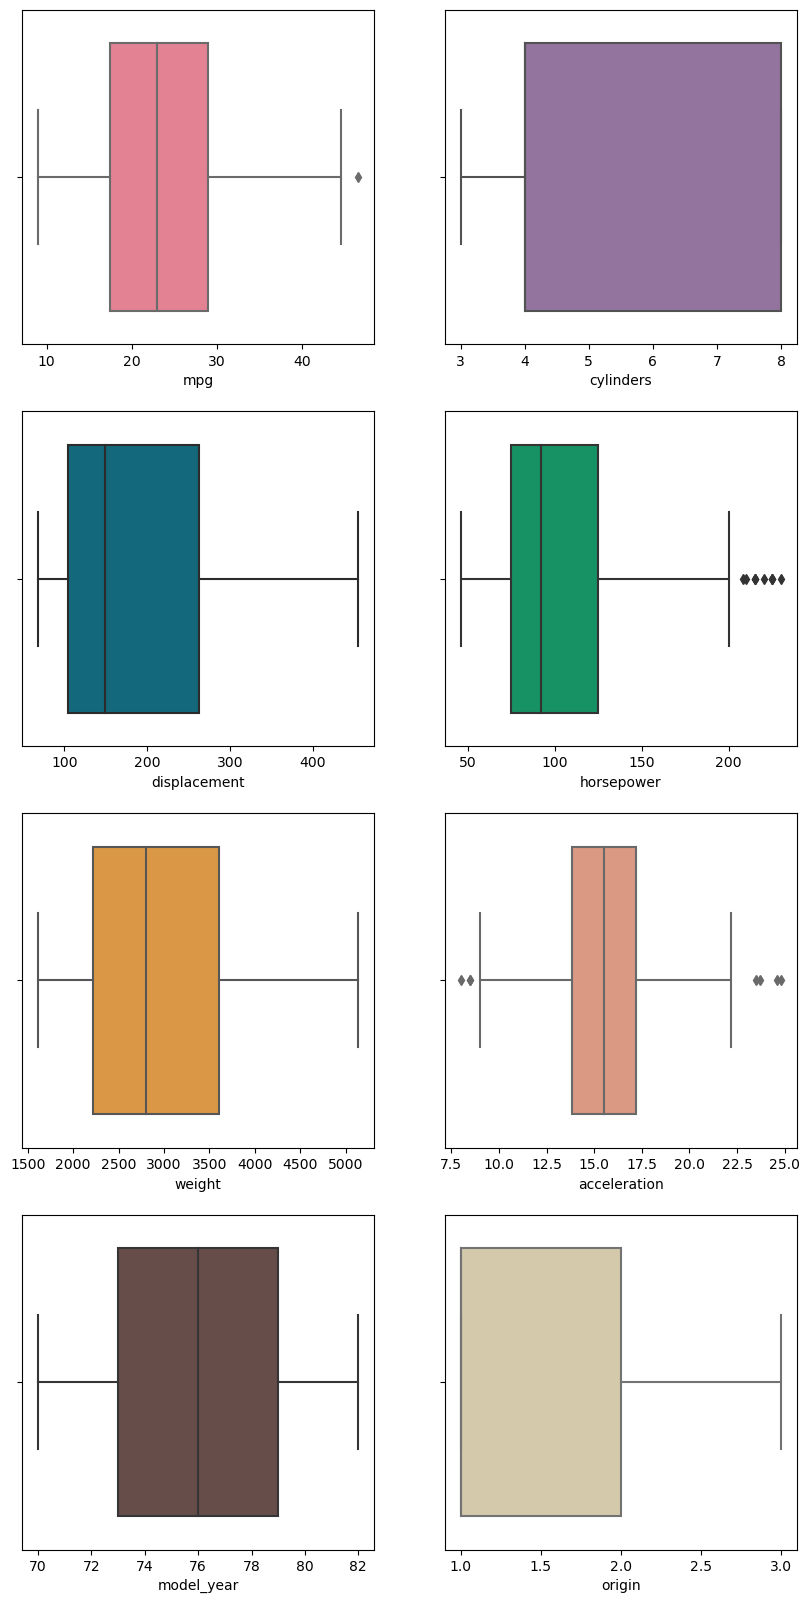

In [20]:

# Calculating the number of rows needed for the figure
num_rows = (len(data.columns) + 2-1)// 2

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_rows, 2, figsize = (10,5*num_rows))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

color_palette = ["#F27289", "#956DA6", "#03738C", "#03A66A", "#F29A2E", "#E89275", "#6B4945", "#DBCDA4"]

# Loop over each column in the data
for i, j in enumerate(data.columns):
    # Create a horizontal box plot for each column with a different color
    sns.boxplot(data = data, x = j, orient = 'h', ax = axes[i], palette=[color_palette[i]])

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">

there are outliers in "mpg", "horsepower", "acceleration" Normally, we would remove these outliers from our dataset to ensure that our analysis is more reliable. However, in this case, I've decided not to remove them because our dataset is very small to begin with and the goal is to predict continuous values("mpg"). By including outliers, it will allow the model to learn the relationships between variables at the extremes.

<a id="Visualization"></a>
<div style="background-color: #90C376; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color: white; text-align: center; font-size:180%; margin: 0;">Step 5 | Data Visualization</h1>
  <span style="color: white;"></span>
</div>

⬆️ [Table of Contents](#contents_tabel)

<a id="feel"></a>
<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#591E1E>Step 5.1 | Distribution of the Dataset :</font></h3>
    
 * Taking a feel of data distribution by plotting a histogram for each attribute 

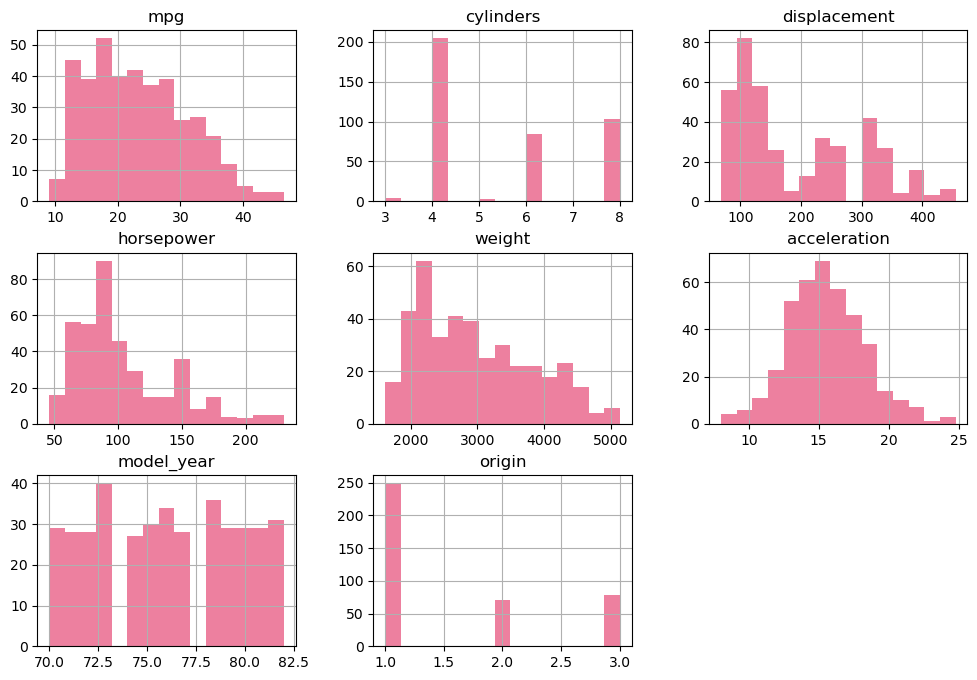

In [21]:
# Create a histogram of the data

data.hist(bins=15, figsize=(12,8), color='#ED809F')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
    
* I personally thinks acceleration is the very important attribute to predict mileage but in our dataset it has very similar data points like 12.8,12.7,11.3,11.5, so I want to group it into bins which may help me find more meaningful interactions.

                                       

In [22]:
# Creating a new column 'acceleration_cat' in the dataframe 'data'
# by categorizing the values in the 'acceleration' column into bins

data['acceleration_cat'] = pd.cut(data['acceleration'], bins = [5.5,11.0,16.5,22.0,27.5])

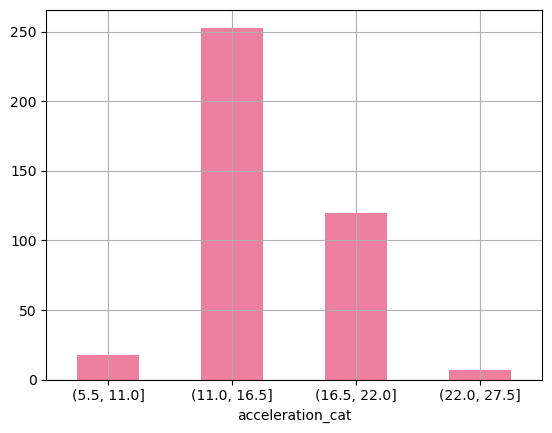

In [23]:
# Plotting the value counts of 'acceleration_cat'

data['acceleration_cat'].value_counts().sort_index().plot.bar(rot= 0, grid = True, color='#ED809F')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
    
* Majority of the values are in the range of 11 to 16.5


In [24]:
# Storing it in a different variable

acc_cat = data.pop('acceleration_cat')

<a id="corr"></a>
<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#591E1E>Step 5.2 | Looking for Correlations :</font></h3>

 * Generate a heatmap of the correlation matrix using seaborn

In [25]:
# Calculate the correlation matrix of the dataset

corr_matrix = data.corr()

<Axes: >

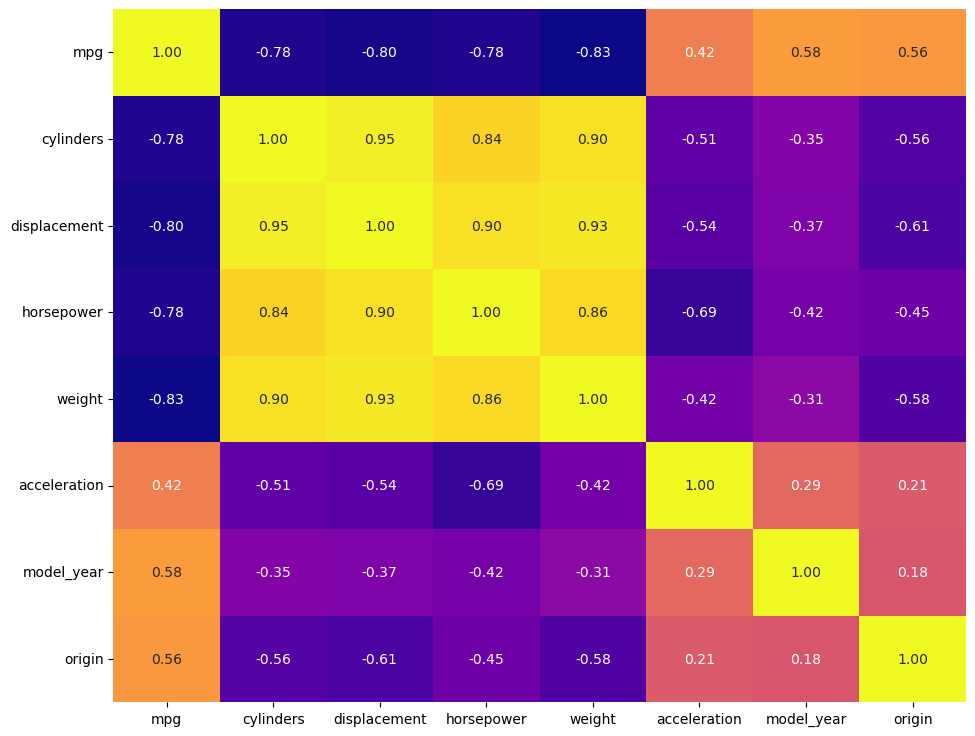

In [26]:
# Generate a heatmap of the correlation matrix using seaborn

fig, axes = plt.subplots(figsize=(11, 9))
sns.heatmap(corr_matrix, cmap='plasma',annot=True, fmt='.2f', cbar=False)

In [27]:
# correlation values of the 'mpg' column in the corr_matrix in descending order.

corr_matrix['mpg'].sort_values(ascending = False)

mpg             1.000000
model_year      0.579267
origin          0.563450
acceleration    0.420289
cylinders      -0.775396
horsepower     -0.776988
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">

* As the corr coefficient ranges from -1 to 1. model year and origin has positive corr and acceleration is also positive but not very strong and others have -ve corr

<Axes: >

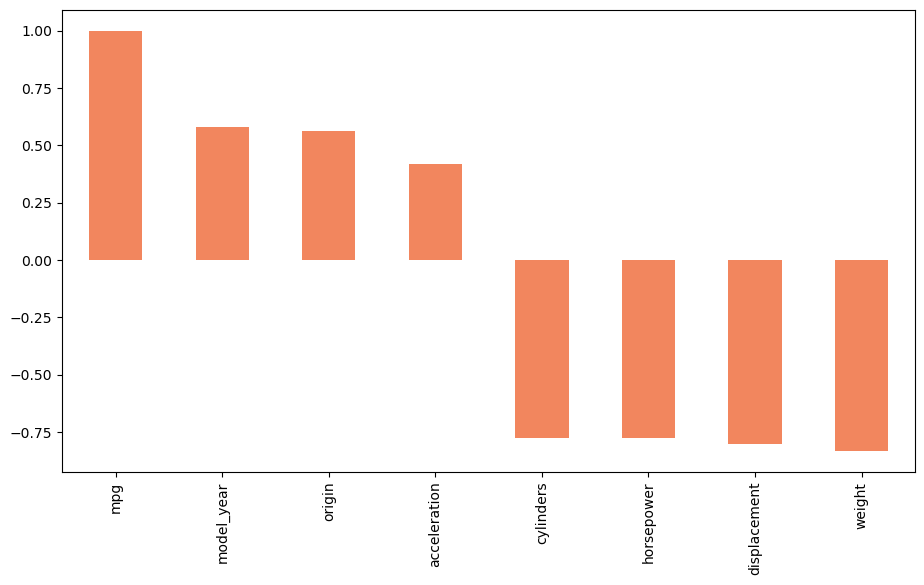

In [28]:
# visualizing the correlation values of the 'mpg' column in descending order

plt.figure(figsize=(11,6))
corr_matrix['mpg'].sort_values(ascending = False).plot(kind='bar',color='#F2865E')

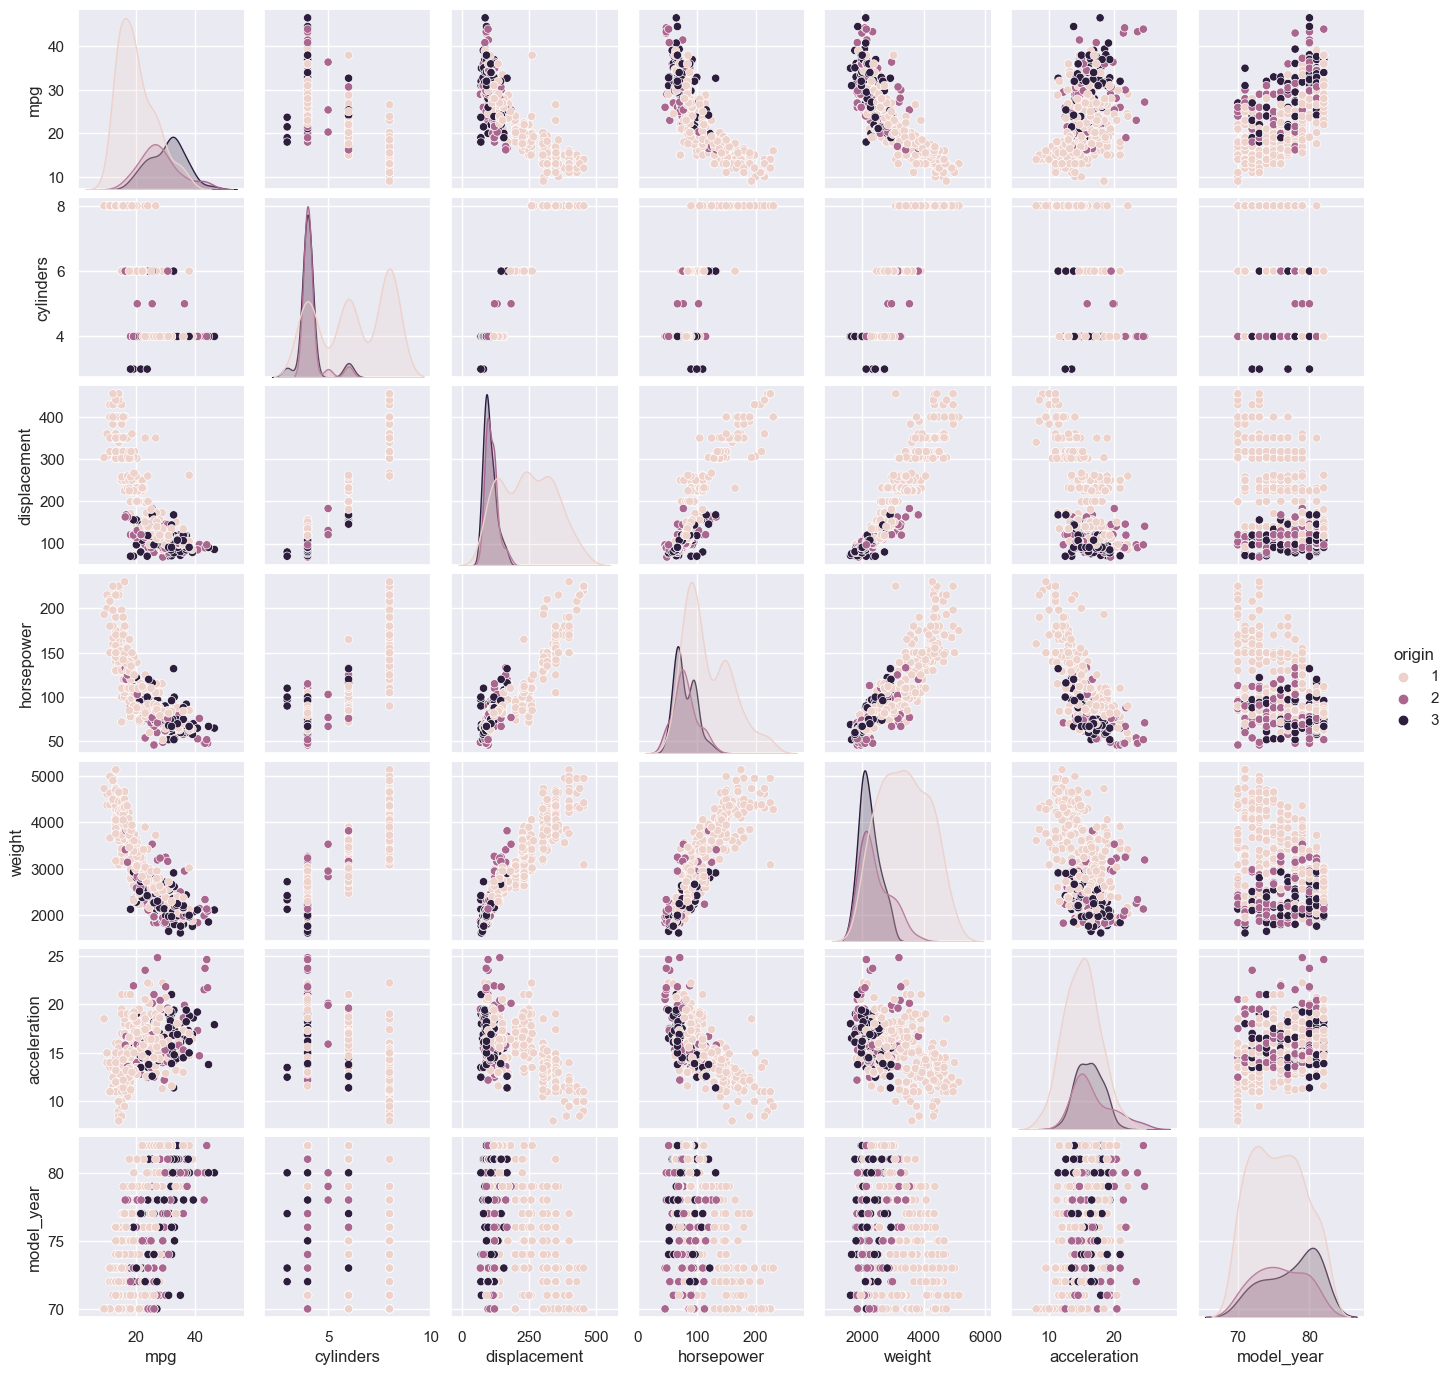

In [29]:
# Creating a pairplot with hue based on 'origin' column

sns.set()
sns.pairplot(data, size = 2.0,hue ='origin')
plt.show()

<a id="EDA"></a>
<div style="background-color: #90C376; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color: white; text-align: center; font-size:180%; margin: 0;">Step 6 | EDA</h1>
  <span style="color: white;"></span>
</div>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#591E1E>Ques1. weight distribution with mpg</font></h3>

In [30]:
data.groupby(['weight','mpg']).size().reset_index().rename(columns = {0:'counts'})

,weight,mpg,counts
0,1613,35.0,1
1,1649,31.0,1
2,1755,39.1,1
3,1760,35.1,1
4,1773,31.0,1
...,...,...,...
387,4951,12.0,1
388,4952,12.0,1
389,4955,12.0,1
390,4997,11.0,1


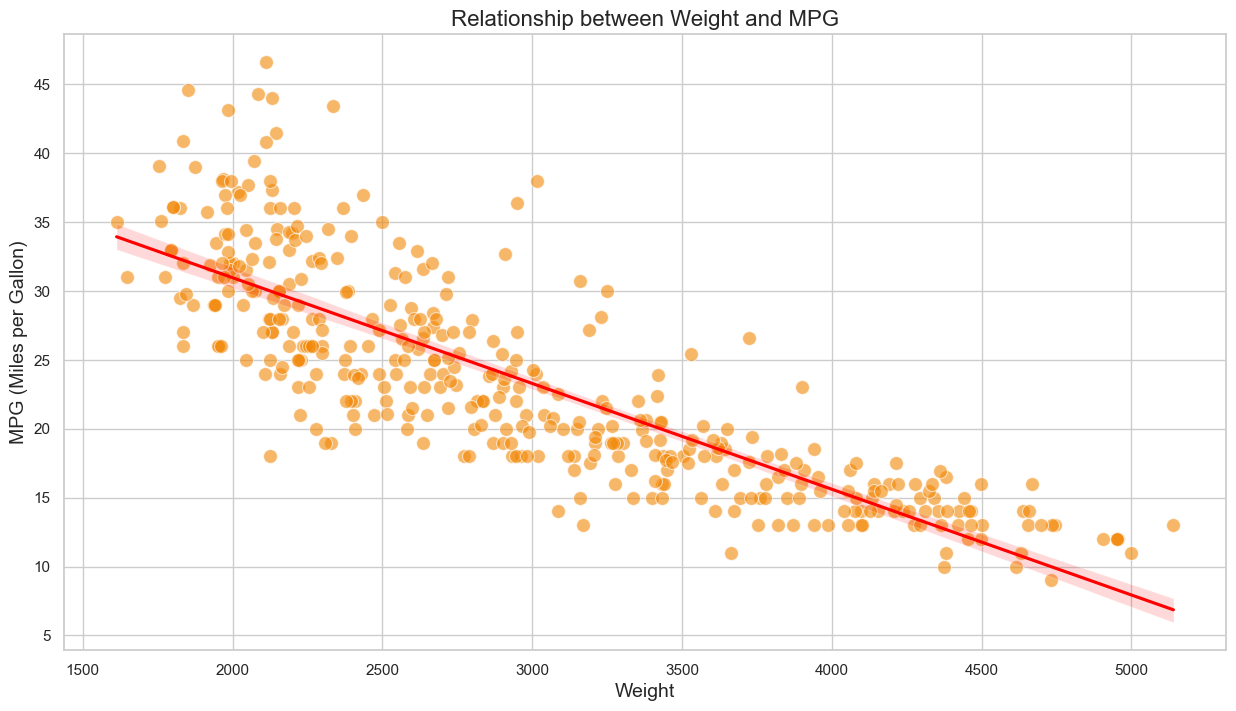

In [31]:
# Set plot size and style
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")

# Scatter plot with a trend line
ax = sns.scatterplot(x='weight', y='mpg', data=data, color='#F28705', alpha=0.6, s=100)
sns.regplot(x='weight', y='mpg', data=data, scatter=False, ax=ax, color='red')

# Set labels and title
ax.set_xlabel('Weight', fontsize=14)
ax.set_ylabel('MPG (Miles per Gallon)', fontsize=14)
ax.set_title('Relationship between Weight and MPG', fontsize=16)

# Display the plot
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">

* The plot shows a clear negative correlation between the weight of a car and its fuel efficiency (MPG). As the weight increases, the MPG tends to decrease. This makes sense because heavier cars typically consume more fuel.

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#591E1E>Ques2. What is the percentage of cylinders distribution</font></h3>

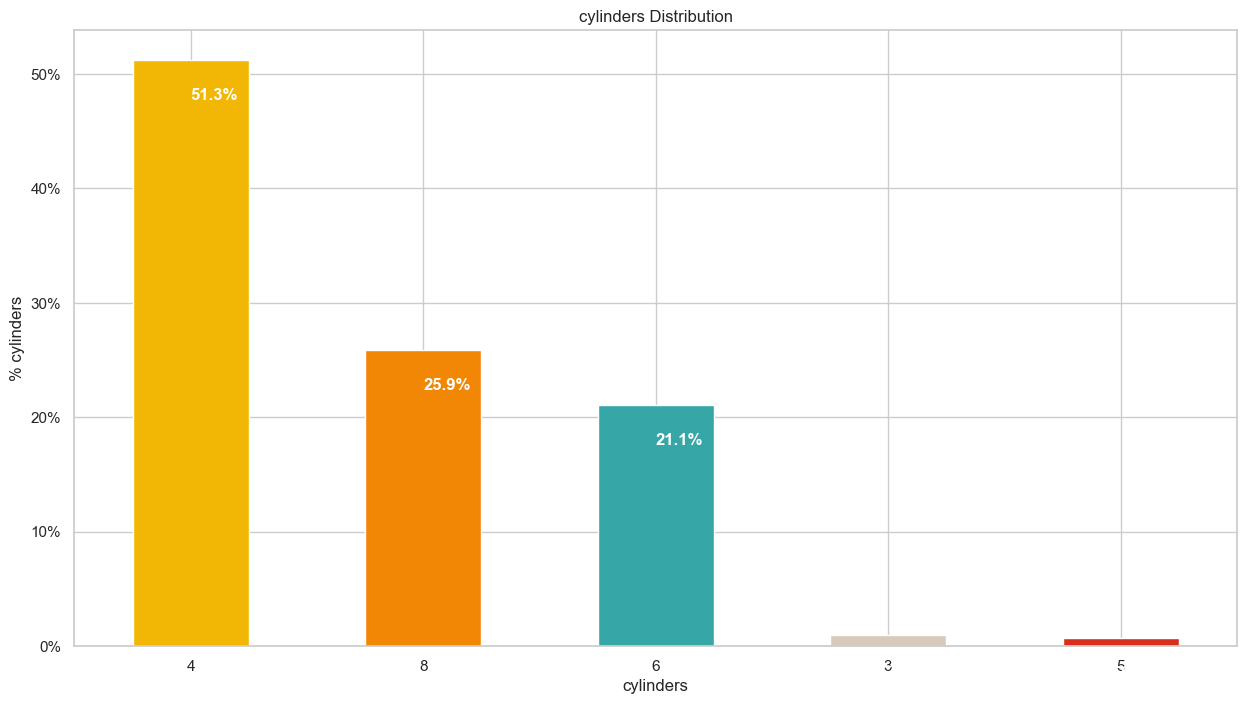

In [32]:
# Creating a figure with a specified size
plt.figure(figsize=(15,8))

# Making a list of colors to use for the bars
colors = ['#F2B705', '#F28705','#37A6A6','#D9C9BA','#D92E1E', 'magenta' ]

# Getting the count of each unique value in the 'cylinders' column
cylinders_counts = data['cylinders'].value_counts()

# Plotting a bar chart of the cylinder counts, normalized to percentages
ax = (cylinders_counts * 100.0 / len(data)).plot(
    kind='bar',
    stacked=True,
    rot=0,
    color=colors
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% cylinders')
ax.set_xlabel('cylinders')
ax.set_title('cylinders Distribution')

# Iterating over the bar heights and adding labels to the bars
total = cylinders_counts.sum()
for bar, count in zip(ax.patches, cylinders_counts):
    percentage = count / total * 100
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 3.5,
            f'{percentage:.1f}%',
            fontsize=12,
            color='white',
            weight='bold'
           )

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#591E1E>Ques3. What is Origin distribution across dataset</font></h3>

In [33]:
data['origin'].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

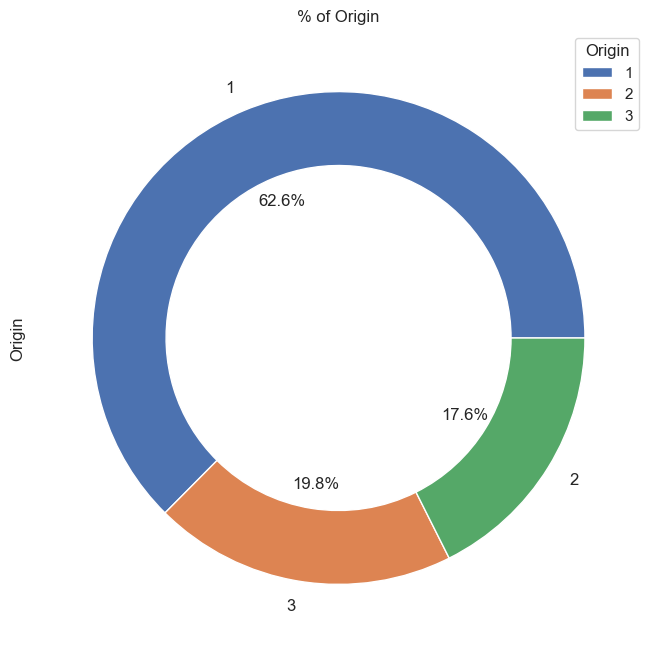

In [34]:
# Plotting a pie chart and then setting the wedgeprops parameter to dict(width=0.3) to make a donut
ax = (data['origin'].value_counts()*100.0 / len(data)).plot.pie(
    autopct='%.1f%%', labels=['1', '3', '2'], figsize=(15, 8), fontsize=12, wedgeprops=dict(width=0.3))

#making major formatter to percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# ylabel and title
ax.set_ylabel('Origin', fontsize=12)
ax.set_title('% of Origin', fontsize=12)

# adding a legend
ax.legend(labels=['1', '2', '3'], title="Origin", bbox_to_anchor=(1, 1))

# showing the plot
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#591E1E>Ques3. What is Model Year distribution across dataset</font></h3>

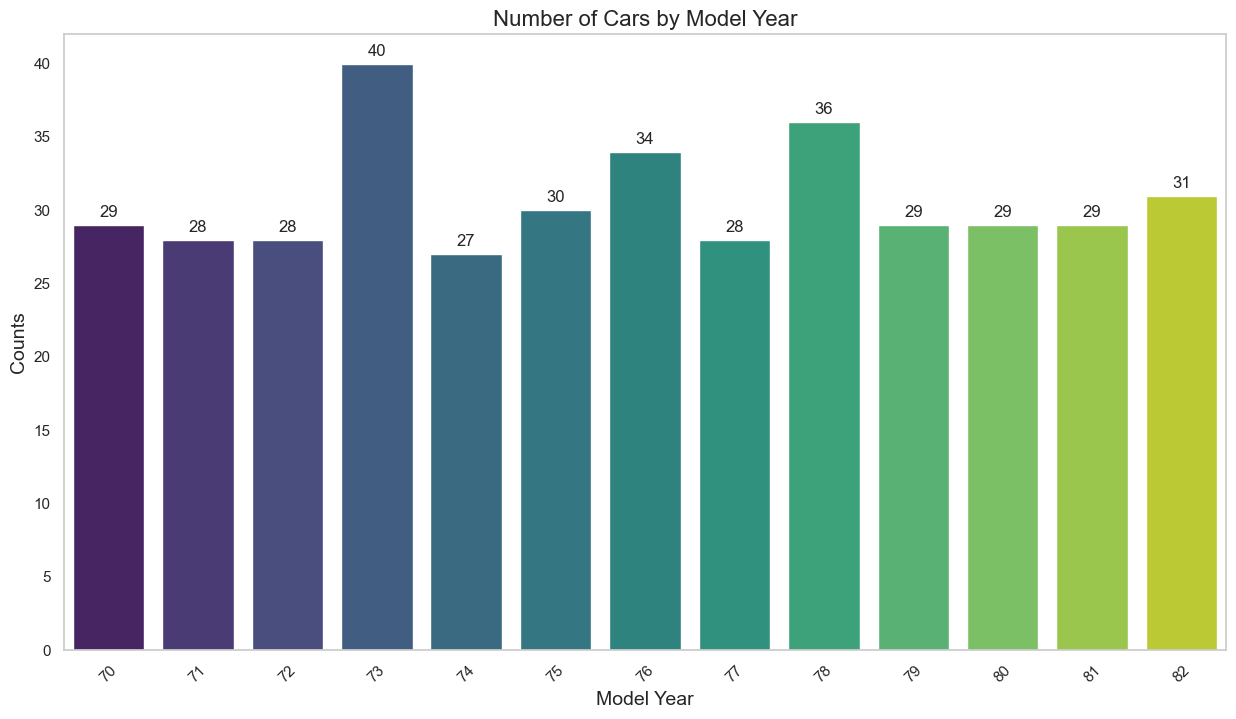

In [35]:
model_year_counts = data['model_year'].value_counts().sort_index()

plt.figure(figsize=(15, 8))

# Plotting a bar chart using seaborn
ax = sns.barplot(x=model_year_counts.index, y=model_year_counts.values, palette="viridis")

# Adding labels and title
ax.set_ylabel('Counts', fontsize=14)
ax.set_xlabel('Model Year', fontsize=14)
ax.set_title('Number of Cars by Model Year', fontsize=16)

# Making a loop that goes through each bar to show the values on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot and deleting the grid
plt.grid(False)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#591E1E>Ques4. What are the top car brands in terms of mpg?</font></h3>

In [36]:
# Reading only one column from the csv file
car_name = pd.read_csv('autos_mpg.csv', usecols = ['car_name'])

In [37]:
car_name.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [38]:
# creating a brand column to store the brand name from the car_name
car_name['brand'] = car_name['car_name'].str.split().str[0]

In [39]:
car_name['brand'].head()

0    chevrolet
1        buick
2     plymouth
3          amc
4         ford
Name: brand, dtype: object

In [40]:
# merging the brand name column with the main dataset in a different variable to make sure we will get average mean accurate
df_brand = pd.merge(data, car_name['brand'], left_index=True, right_index=True)

In [41]:
df_brand.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,brand
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford


In [42]:
# getting the average mpg of the brands to rank them
brand_mpg = df_brand.groupby('brand')['mpg'].mean().reset_index()

In [43]:
brand_mpg.head()

,brand,mpg
0,amc,18.246429
1,audi,26.714286
2,bmw,23.750000
3,buick,19.182353
4,cadillac,19.750000


In [44]:
# Now sorting them to get the top 10 brands in terms of 'mpg'
brand_mpg_sorted = brand_mpg.sort_values(by='mpg', ascending=False).head(10)
brand_mpg_sorted

,brand,mpg
36,vw,39.016667
21,nissan,36.000000
32,triumph,35.000000
15,honda,33.761538
27,renault,32.880000
10,datsun,31.113043
17,mazda,30.860000
29,subaru,30.525000
33,vokswagen,29.800000
34,volkswagen,29.106667


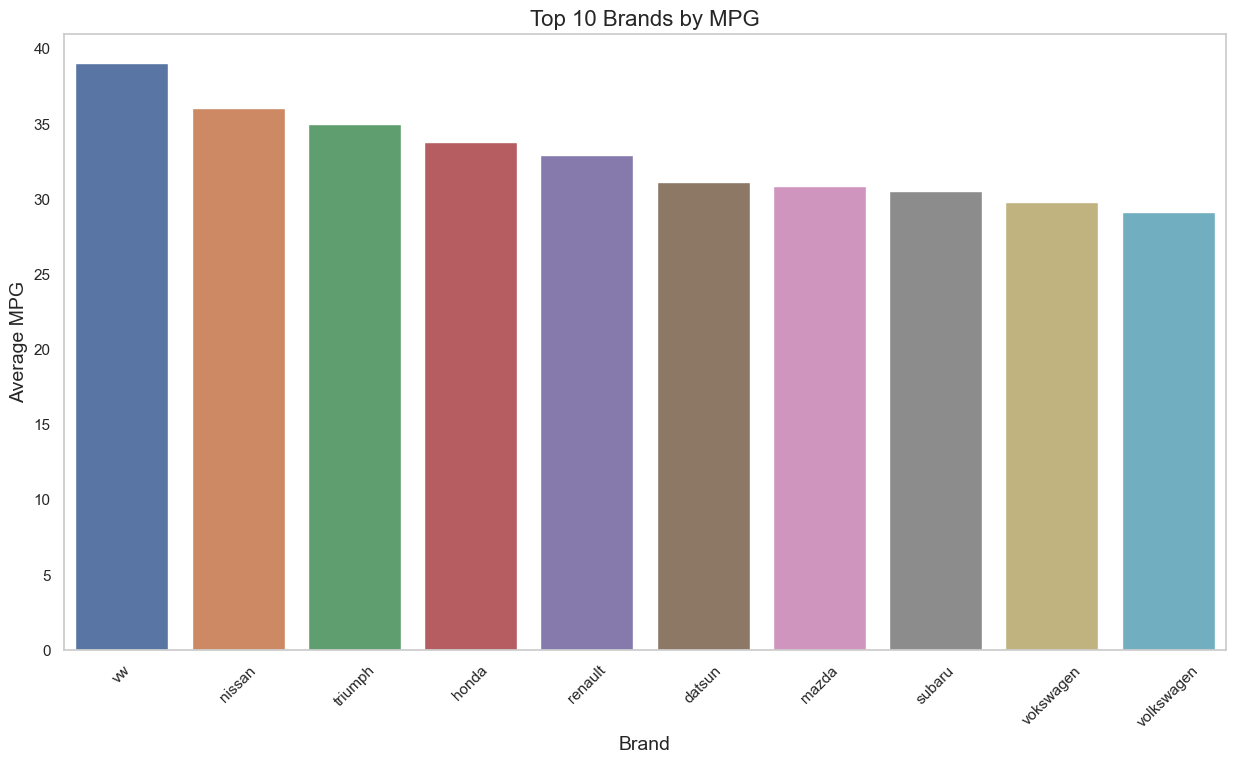

In [45]:
# Visualizing it to understand better
plt.figure(figsize=(15, 8))

# Create a bar plot
sns.barplot(x='brand', y='mpg', data=brand_mpg_sorted)

# Set labels and title
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Average MPG', fontsize=14)
plt.title('Top 10 Brands by MPG', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.grid(False)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#591E1E>Ques5. How has the average mpg of cars changed over the years?</font></h3>

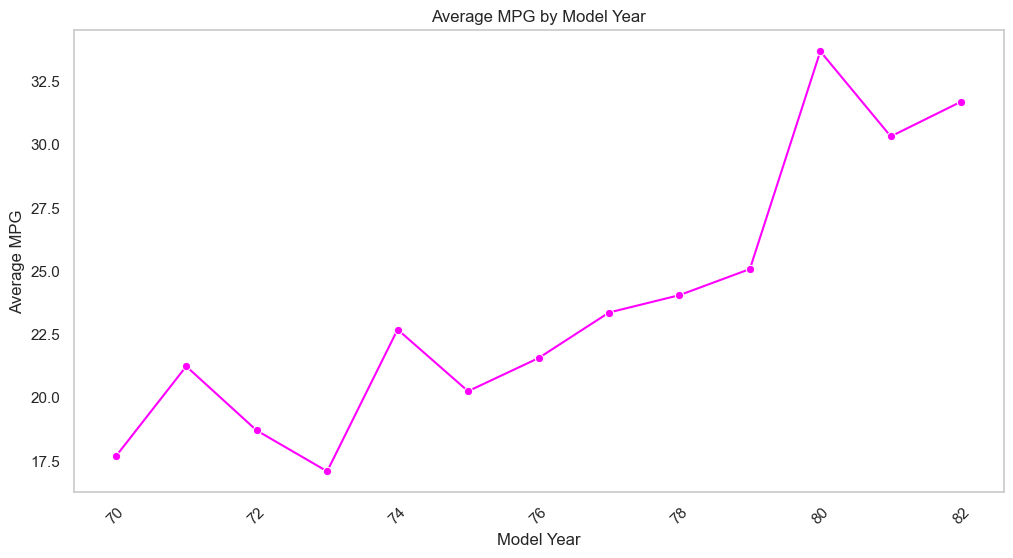

In [46]:
# Calculating the average MPG for each model year
avg_mpg_by_year = data.groupby('model_year')['mpg'].mean().reset_index()

# Creaing a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='model_year', y='mpg', data=avg_mpg_by_year, marker='o', color = 'magenta')
plt.title('Average MPG by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

<a id="categoryfeature"></a>
<div style="background-color: #90C376; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color: white; text-align: center; font-size:180%; margin: 0;">Step 7 | Categorical Features Encoding</h1>
  <span style="color: white;"></span>
</div>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">


| mpg  | cylinders | displacement | horsepower | weight | acceleration | model_year | origin |
|------|-----------|--------------|------------|--------|--------------|------------|--------|
| 18.0 | 8         | 307.0        | 130        | 3504   | 12.0         | 70         | 1      |
| 15.0 | 8         | 350.0        | 165        | 3693   | 11.5         | 70         | 1      |
| 18.0 | 8         | 318.0        | 150        | 3436   | 11.0         | 70         | 1      |
| 16.0 | 8         | 304.0        | 150        | 3433   | 12.0         | 70         | 1      |
| 17.0 | 8         | 302.0        | 140        | 3449   | 10.5         | 70         | 1      |
    

Although both 'origin' and 'cylinders' are numerical variables, they have different underlying meanings and should be treated accordingly.

 * 'origin' represents the country where a car was manufactured, and its numerical values do not imply a natural order or    hierarchy. For example, an 'origin' value of 3 does not mean it is greater than an 'origin' value of 1. Therefore, it is more appropriate to consider 'origin' as a categorical feature.
    
 * 'cylinders' is a numeric variable, but it represents discrete categories (e.g., 4, 6, or 8 cylinders). Treating 'cylinders' as a numeric variable could lead to incorrect assumptions, such as an ordinal relationship between the values (e.g., 6 cylinders being greater than 4 cylinders).
    
 * To avoid these potential misinterpretations, we will create dummy variables for both 'origin' and 'cylinders' columns. This will allow our model to correctly understand the categorical nature of these variables and make more accurate predictions.

In [47]:
# Making dummies of origin and cylinders
data = pd.get_dummies(data, columns=['cylinders', 'origin'], drop_first=True, dtype = int)

<a id="split"></a>
<div style="background-color: #90C376; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color: white; text-align: center; font-size:180%; margin: 0;">Step 8 | Skewing, Spliting and Scaling</h1>
  <span style="color: white;"></span>
</div>

⬆️ [Table of Contents](#contents_tabel)

Skewness values for each column:
horsepower: 1.10
weight: 0.53
acceleration: 0.28
mpg: 0.46
displacement: 0.72


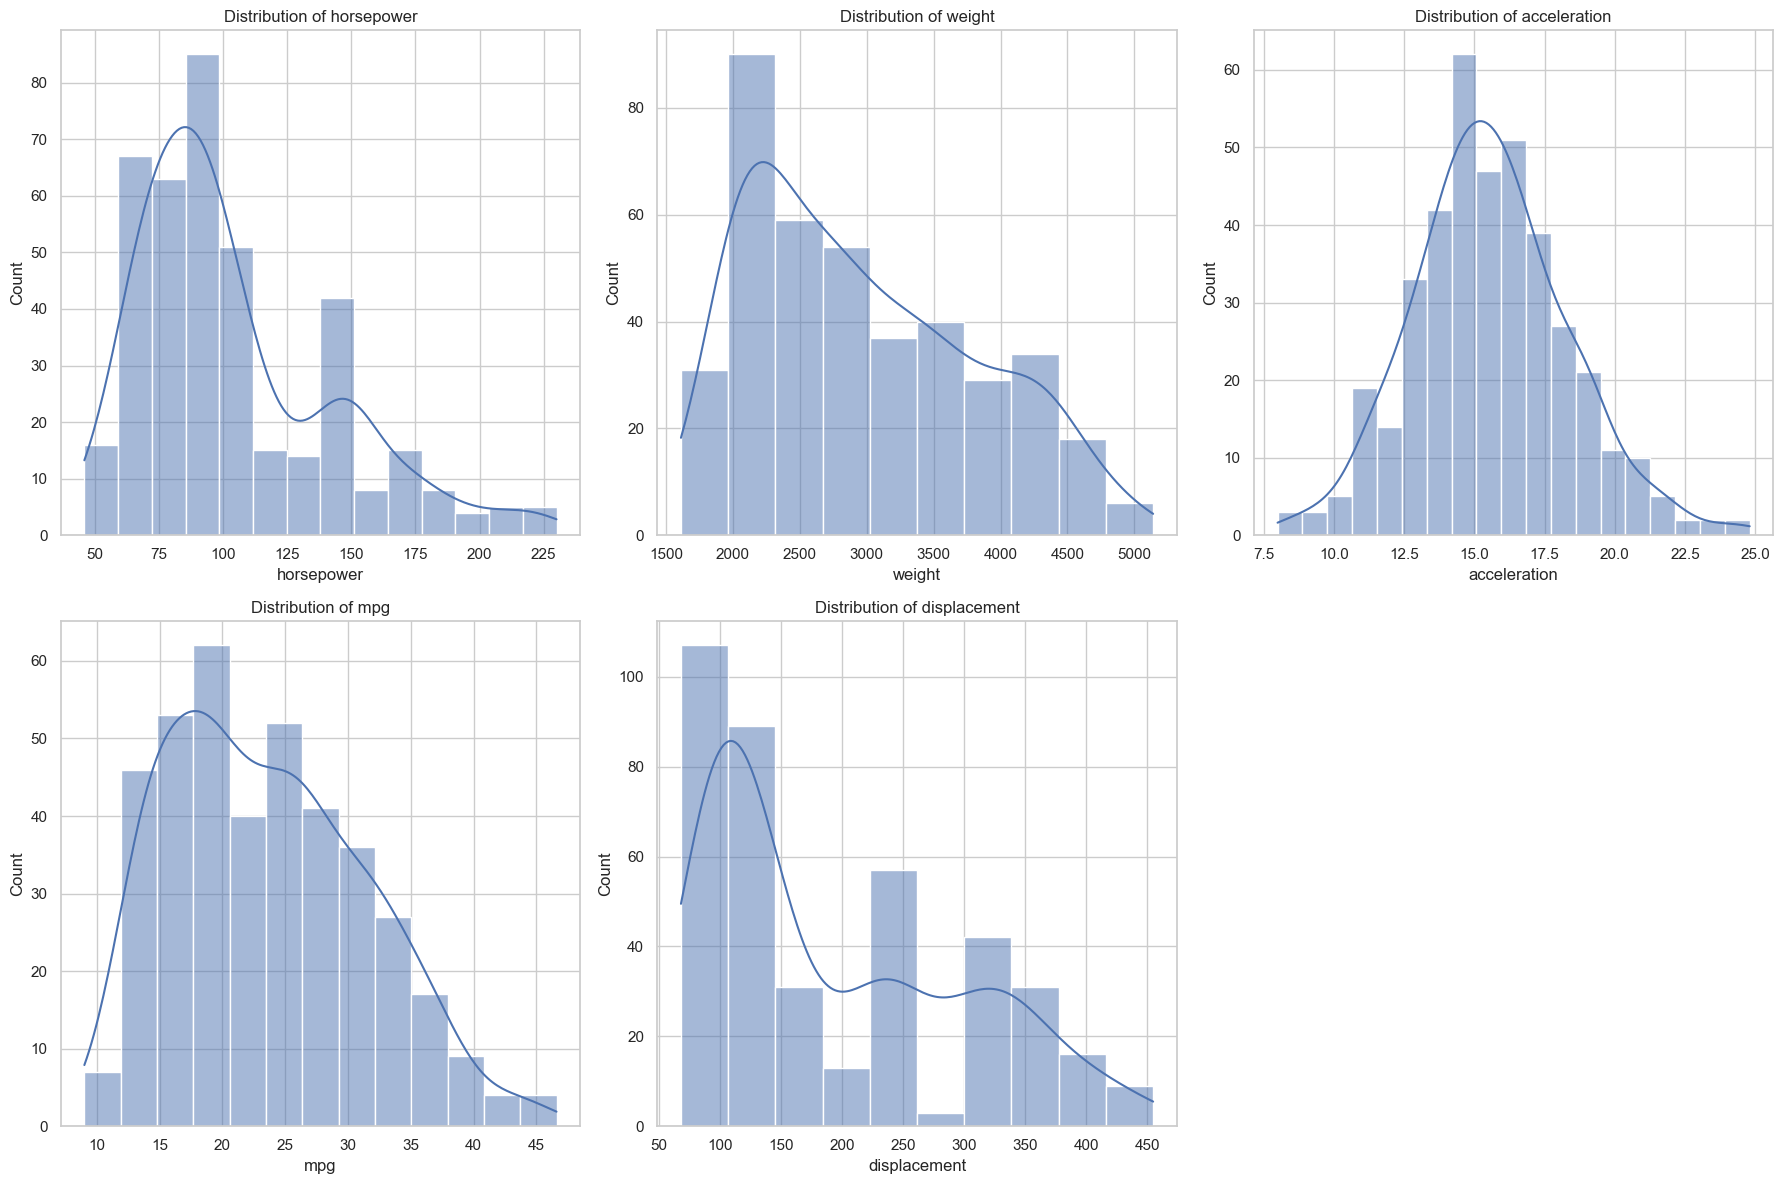

In [48]:

# Checking skewness on these columns because they are the continuous variables
columns_to_check = ['horsepower', 'weight', 'acceleration', 'mpg', 'displacement']

# Calculating and print skewness for each column
print("Skewness values for each column:")
for column in columns_to_check:
    skewness = skew(data[column])
    print(f"{column}: {skewness:.2f}")

# Set up the subplot grid
num_columns = len(columns_to_check)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns_to_check):
    sns.histplot(data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    
# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Lambda for horsepower: -0.4683733893465042
Lambda for weight: -0.3264837479990197
Lambda for displacement: -0.30739757305060084


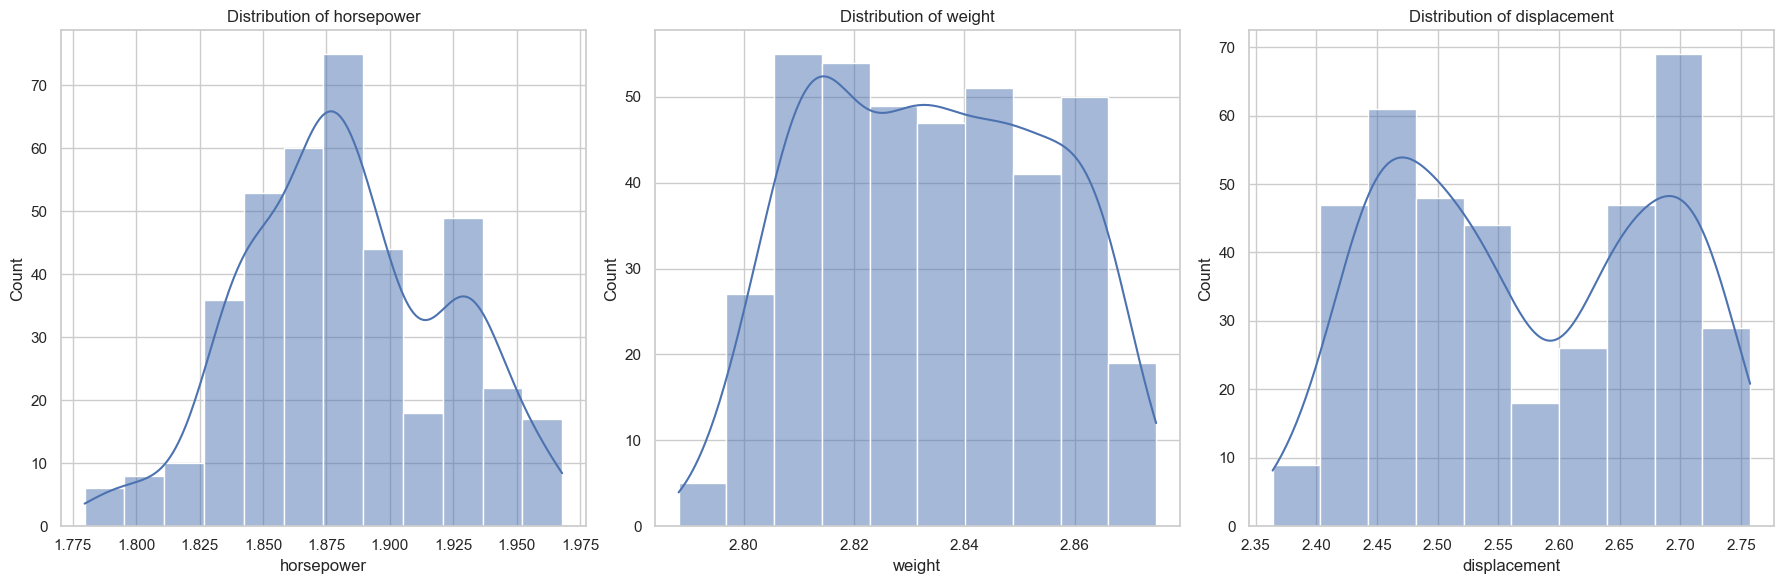

In [49]:
# Appling Box-Cox transformation to the necessary columns
columns_to_transform = ['horsepower', 'weight', 'displacement']

# Box-Cox requires positive values, so shift data if necessary
for column in columns_to_transform:
    if (data[column] <= 0).any():
        data[column] = data[column] - data[column].min() + 1

    # Apply Box-Cox transformation
    data[column], lam = boxcox(data[column])
    print(f'Lambda for {column}: {lam}')

# Visualize transformed columns
num_columns = len(columns_to_transform)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 6))
axes = axes.flatten()

for i, column in enumerate(columns_to_transform):
    sns.histplot(data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;"> 
 
 * The Box-Cox transformation was somewhat effective in normalizing the distributions of horsepower, weight, and displacement. However, some skewness and multimodal characteristics remain, indicating that the data might still deviate from a perfectly normal distribution.
 

In [50]:
data.head()

,mpg,displacement,horsepower,weight,acceleration,model_year,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_2,origin_3
0,18.0,2.693669,1.916628,2.849686,12.0,70,0,0,0,1,0,0
1,15.0,2.715764,1.939706,2.853313,11.5,70,0,0,0,1,0,0
2,18.0,2.699690,1.930788,2.848317,11.0,70,0,0,0,1,0,0
3,16.0,2.691977,1.930788,2.848256,12.0,70,0,0,0,1,0,0
4,17.0,2.690838,1.924080,2.848582,10.5,70,0,0,0,1,0,0


In [51]:
#storing the data in X and target variable in y
X = data.drop('mpg', axis = 1)
y = data['mpg']

In [52]:
# Splitting the data into 80:20 (80% to train and 20% to test)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [53]:
# Scaling the data to a common range
scaler = StandardScaler()

In [54]:
# Scaling X_train
X_train = scaler.fit_transform(X_train)

In [55]:
# Scaling X_test
X_test = scaler.transform(X_test)

<a id="Train"></a>
<div style="background-color: #90C376; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color: white; text-align: center; font-size:180%; margin: 0;">Step 9 | Train and Evaluate</h1>
  <span style="color: white;"></span>
</div>

⬆️ [Table of Contents](#contents_tabel)


<a id="linear"></a>  
<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><span style= "border-bottom: 3px solid #A66F2D; padding-bottom: 4px;"><font color=#591E1E>1. Linear Regression:</font></span></h3>

In [56]:
# assigning Linear Regression to model
model = LinearRegression()

In [57]:
# training the model using train data
model.fit(X_train,y_train)

LinearRegression()

In [58]:
# making predictions
y_pred = model.predict(X_test)

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#BF9004> Evaluating the model:</font></h3>

In [59]:
# finding the mean squared error
mse = mean_squared_error(y_test,y_pred)

In [60]:
# finding the mean absolute error
mae = mean_absolute_error(y_test,y_pred)

In [61]:
# finding the root mean squared error
rmse = np.sqrt(mse)

In [62]:
# finging the R-Squared value
r2 = r2_score(y_test, y_pred)

In [63]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R Squared: {r2:.2f}")

Mean Squared Error: 6.44
Mean Absolute Error: 1.91
Root Mean Squared Error: 2.54
R Squared: 0.88


<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">

* We will compare our linear regression model to the baseline model

In [64]:
# Compare with baseline (mean predictor)
# storing an array of predicted values, where each value is the mean of the target variable
y_mean_pred = [y_train.mean()] * len(y_test)

baseline_mse = mean_squared_error(y_test, y_mean_pred) #getting the mean squared error
baseline_rmse = np.sqrt(baseline_mse) #getting the root mean squared error
baseline_r2 = r2_score(y_test, y_mean_pred) #getting the R-Squared value
baseline_mae = np.sqrt(baseline_mse)


In [65]:
print(f"Baseline Mean Squared Error: {baseline_mse:.2f}")
print(f"Baseline Mean Absolute Error: {baseline_mae:.2f}")
print(f"Baseline Root Mean Squared Error: {baseline_rmse:.2f}")
print(f"Baseline R Squared: {baseline_r2:.2f}")

Baseline Mean Squared Error: 53.98
Baseline Mean Absolute Error: 7.35
Baseline Root Mean Squared Error: 7.35
Baseline R Squared: -0.00


In [66]:
# Using cross-validation to evaluate the performance of a linear regression model on unseen data using 5 folds
scores1 = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

In [67]:
# getting the mean and std of cross-validation
pd.Series(scores1).describe()

count     5.000000
mean    -12.432194
std       7.317835
min     -24.219293
25%     -13.233852
50%     -12.041680
75%      -6.524599
max      -6.141544
dtype: float64

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#591E1E> Interpretation:</font></h3>


 * The baseline model has very high error metrics, indicating poor performance
 * The baseline model serves as a reference point. Any predictive model should perform significantly better than this baseline.
    
<h3 align="left"><font color=#591E1E> Conclusion:</font></h3>

 * The linear regression model shows a significant improvement over the baseline model. An R-squared of 0.88 indicates that the model explains 88% of the variance in the data, which is a strong fit. However, the negative cross-validation scores indicate possible overfitting, meaning the model might not generalize well to unseen data.

<a id="decision"></a>  
<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><span style= "border-bottom: 3px solid #A66F2D; padding-bottom: 4px;"><font color=#591E1E>2. Decision Tree Regression: </font></span></h3>

In [68]:
# assigning Decision Tree Regression to model2
model2 = DecisionTreeRegressor(random_state=42)

In [69]:
# fitting the model to train dataset
model2.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [70]:
# making predictions
y_pred = model2.predict(X_test)

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#BF9004> Evaluating the model:</font></h3>

In [71]:
# Evaluating with mean squared error, mean absolute error and r-squared
mse_2 = mean_squared_error(y_test,y_pred)
mae_2 = mean_absolute_error(y_test,y_pred)
rmse_2 = np.sqrt(mse_2)
r2_2 = r2_score(y_test, y_pred)

In [72]:
# printing the results
print(f"Mean Squared Error: {mse_2:.2f}")
print(f"Mean Absolute Error: {mae_2:.2f}")
print(f"Root Mean Squared Error: {rmse_2:.2f}")
print(f"R Squared: {r2_2:.2f}")

Mean Squared Error: 10.23
Mean Absolute Error: 2.25
Root Mean Squared Error: 3.20
R Squared: 0.81


In [73]:
# Doing cross validation with 5 folds
scores2 = cross_val_score(model2, X, y, cv=5, scoring='neg_mean_squared_error')

In [74]:
# checking the mean and std
pd.Series(scores2).describe()

count     5.000000
mean    -14.271257
std       9.485564
min     -27.487468
25%     -21.105316
50%      -9.319875
75%      -6.837375
max      -6.606250
dtype: float64

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#591E1E> Interpretation:</font></h3>


 * The decision tree model performs worse than the linear regression model, with a higher error and lower R². The cross-validation results indicate poor generalization and high variability
    
<h3 align="left"><font color=#591E1E> Conclusion:</font></h3>

 * Decision trees are prone to overfitting, especially with small datasets.

<a id="randomforest"></a>  
<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><span style= "border-bottom: 3px solid #A66F2D; padding-bottom: 4px;"><font color=#591E1E>3. Random Forest Regression: </font></span></h3>

In [75]:
# assigning Random Forest Regression to model3
model3 = RandomForestRegressor(n_estimators=100, random_state=42)

In [76]:
# fitting the model to train dataset
model3.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [77]:
# making predictions
y_pred = model3.predict(X_test)

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#BF9004> Evaluating the model:</font></h3>

In [78]:
# Evaluating with mean squared error, mean absolute error and r-squared
mse_3 = mean_squared_error(y_test,y_pred)
mae_3 = mean_absolute_error(y_test,y_pred)
rmse_3 = np.sqrt(mse_3)
r2_3 = r2_score(y_test, y_pred)

In [79]:
# printing the results
print(f"Mean Squared Error: {mse_3:.2f}")
print(f"Mean Absolute Error: {mae_3:.2f}")
print(f"Root Mean Squared Error: {rmse_3:.2f}")
print(f"R Squared: {r2_3:.2f}")

Mean Squared Error: 4.61
Mean Absolute Error: 1.59
Root Mean Squared Error: 2.15
R Squared: 0.91


In [80]:
# Doing cross validation with 5 folds
scores3 = cross_val_score(model3, X, y, cv=5, scoring='neg_mean_squared_error')

In [81]:
# checking the mean and std
pd.Series(scores3).describe()

count     5.000000
mean     -9.002062
std       8.135169
min     -22.791149
25%      -9.953649
50%      -4.905527
75%      -4.032872
max      -3.327116
dtype: float64

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#591E1E> Interpretation:</font></h3>


 * Random Forest performs the best among the models so far, with the lowest error metrics and the highest R² value of 0.91, indicating excellent model performance. The cross-validation results show improved generalization compared to previous models.
    
<h3 align="left"><font color=#591E1E> Conclusion:</font></h3>

 * Random Forest is a strong model for this dataset. It reduces overfitting and provides robust predictions. This model can be considered a benchmark for further comparisons

<a id="gradient"></a>  
<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><span style= "border-bottom: 3px solid #A66F2D; padding-bottom: 4px;"><font color=#591E1E>4. Gradient Boosting Regression: </font></span></h3>

In [82]:
# assigning gradient boosting regression to model4
model4 = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [83]:
# fitting the model to train dataset
model4.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [84]:
# making predictions
y_pred = model4.predict(X_test)

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#BF9004> Evaluating the model:</font></h3>

In [85]:
# Evaluating with mean squared error, mean absolute error and r-squared
mse_4 = mean_squared_error(y_test,y_pred)
mae_4 = mean_absolute_error(y_test,y_pred)
rmse_4 = np.sqrt(mse_4)
r2_4 = r2_score(y_test, y_pred)

In [86]:
# printing the results
print(f"Mean Squared Error: {mse_4:.2f}")
print(f"Mean Absolute Error: {mae_4:.2f}")
print(f"Root Mean Squared Error: {rmse_4:.2f}")
print(f"R Squared: {r2_4:.2f}")

Mean Squared Error: 5.10
Mean Absolute Error: 1.71
Root Mean Squared Error: 2.26
R Squared: 0.91


In [87]:
# Doing cross validation with 5 folds
scores4 = cross_val_score(model4, X, y, cv=5, scoring='neg_mean_squared_error')

In [88]:
# checking the mean and std
pd.Series(scores4).describe()

count     5.000000
mean     -9.044342
std       7.533661
min     -21.623806
25%     -10.456581
50%      -5.202251
75%      -4.478393
max      -3.460681
dtype: float64

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#591E1E> Interpretation:</font></h3>


 * Gradient Boosting performs very well, with metrics close to those of the Random Forest model. The R² of 0.91 shows strong predictive power, and the cross-validation results indicate good generalizability.
    
<h3 align="left"><font color=#591E1E> Conclusion:</font></h3>

 * Gradient Boosting is also a top performer for this dataset. It offers similar benefits to Random Forest, with the potential for slightly different trade-offs in terms of bias-variance balance.

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#591E1E>Overall Conclusions:</font></h3>
    
 * Linear Regression: Good performance but suffers from overfitting.
 * Decision Tree: Lower performance due to overfitting.
 * Random Forest: Best performance with low error metrics and high R². Good generalization.
 * Gradient Boosting: Comparable to Random Forest, with strong performance and good generalization.
    
__Random Forest and Gradient Boosting are the top choices for this dataset due to their strong performance and generalizability.__
    
__Further optimizing Random Forest and Gradient Boosting models with hyperparameter tuning.__

<a id="hyperparametertuning"></a>
<div style="background-color: #90C376; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color: white; text-align: center; font-size:180%; margin: 0;">Step 10 | Hyperparameter Tuning</h1>
  <span style="color: white;"></span>
</div>

⬆️ [Table of Contents](#contents_tabel)

<a id="gridrandom"></a>  
<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><span style= "border-bottom: 3px solid #A66F2D; padding-bottom: 4px;"><font color=#591E1E>1. GridSearchCV For Random Forest:</font></span></h3>

In [89]:
# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing the model
model_forest = RandomForestRegressor(random_state=42)

# Performing Grid Search
grid_search = GridSearchCV(estimator=model_forest, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y) # fitting the whole dataset instead of train dataset because cv = 5 will perform 5 folds on the whole data

# the best parameters and the best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print(f"Best Parameters: {best_params}")
print(f"Best RMSE: {best_score:.2f}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE: 2.97


In [90]:
# Initializing the Random Forest model with the best parameters
best_rf_model = RandomForestRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)

# Performing cross-validation
scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

# Print the cross-validation scores
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Standard Deviation of RMSE:", rmse_scores.std())

Cross-Validation RMSE Scores: [1.80909274 2.23797679 1.99753573 3.13470198 4.67964943]
Mean RMSE: 2.7717913338359765
Standard Deviation of RMSE: 1.0566782781057675


<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#591E1E> Interpretation:</font></h3>


 * mean RMSE of approximately 2.77 and The standard deviation of RMSE (1.06) indicates the variability of the model's performance across different folds of the cross-validation.
    
<h3 align="left"><font color=#591E1E> Conclusion:</font></h3>

 * The model's performance is consistent, as indicated by the low standard deviation of RMSE.

<a id="gridgradient"></a>  
<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><span style= "border-bottom: 3px solid #A66F2D; padding-bottom: 4px;"><font color=#591E1E>2. GridSearchCV For GradientBoosting:</font></span></h3>

In [91]:
# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing the model
model_gb = GradientBoostingRegressor(random_state=42)

# Performing Grid Search
grid_search = GridSearchCV(estimator=model_gb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Getting the best parameters and the best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print(f"Best Parameters: {best_params}")
print(f"Best RMSE: {best_score:.2f}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best RMSE: 2.92


In [92]:
# Best parameters obtained from GridSearchCV
best_params_gb = {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

# Initialize the Gradient Boosting model with the best parameters
best_gb_model = GradientBoostingRegressor(**best_params_gb, random_state=42)

# Perform cross-validation
scores_gb = cross_val_score(best_gb_model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores_gb = np.sqrt(-scores_gb)

# Print the cross-validation scores
print("Cross-Validation RMSE Scores:", rmse_scores_gb)
print("Mean RMSE:", rmse_scores_gb.mean())
print("Standard Deviation of RMSE:", rmse_scores_gb.std())

Cross-Validation RMSE Scores: [1.86291869 2.13592374 2.29953842 3.1457194  4.39731056]
Mean RMSE: 2.7682821642546687
Standard Deviation of RMSE: 0.920377452419369


<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#591E1E> Interpretation:</font></h3>


 * Both models have almost the same mean RMSE (2.77), indicating that, on average, their prediction errors are quite similar.
 * The Random Forest Regressor has a higher standard deviation (1.06) compared to the Gradient Boosting Regressor (0.92). This suggests that the Gradient Boosting Regressor's performance is more consistent across different folds of the cross-validation.
    
<h3 align="left"><font color=#591E1E> Conclusion:</font></h3>

 * Both the Random Forest and Gradient Boosting models perform similarly in terms of prediction accuracy, as indicated by their mean RMSE values.
 * The Gradient Boosting Regressor shows slightly more consistent performance across different folds, as indicated by its lower standard deviation.
 * So, We'll value consistency in performance so we'll choose Gradient Boosting model

<a id="fitting"></a>
<div style="background-color: #90C376; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color: white; text-align: center; font-size:180%; margin: 0;">Step 11 | Fitting the best model and residual analysis</h1>
  <span style="color: white;"></span>
</div>

⬆️ [Table of Contents](#contents_tabel)

In [93]:
# fitting the train dataset to the best parameter of the gradient boosting model
best_gb_model.fit(X_train,y_train)

GradientBoostingRegressor(min_samples_leaf=2, min_samples_split=5,
                          random_state=42)

In [94]:
# Make predictions
y_pred = best_gb_model.predict(X_test)

# Calculate evaluation metrics
mse_gb = mean_squared_error(y_test, y_pred)
mae_gb = mean_absolute_error(y_test, y_pred)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred)

print(f"Test Set Mean Squared Error: {mse_gb:.2f}")
print(f"Test Set Mean Absolute Error: {mae_gb:.2f}")
print(f"Test Set Root Mean Squared Error: {rmse_gb:.2f}")
print(f"Test Set R Squared: {r2_gb:.2f}")

Test Set Mean Squared Error: 5.18
Test Set Mean Absolute Error: 1.74
Test Set Root Mean Squared Error: 2.28
Test Set R Squared: 0.90


<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#591E1E> Conclusion:</font></h3>


The evaluation metrics demonstrate that our regression model performs well in predicting fuel efficiency (mpg). Specifically:

 * The low MSE (5.18) and RMSE (2.28) values indicate that the model's predictions are close to the actual values, with small average errors.
 * The MAE (1.74) shows that the model's average absolute error is reasonably low, indicating accurate predictions.
 * The high R² value (0.90) signifies that the model explains a large proportion of the variance in fuel efficiency, making it a reliable predictor.
    
Overall, these metrics suggest that our regression model is effective and accurate in predicting fuel efficiency, making it a valuable tool for understanding and improving automotive fuel economy.

<a id="residual"></a>  
<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><span style= "border-bottom: 3px solid #A66F2D; padding-bottom: 4px;"><font color=#591E1E>Residual Analysis:</font></span></h3>

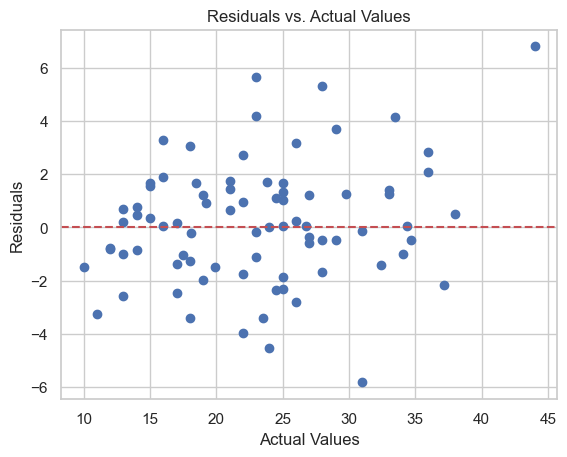

In [95]:
# Calculatting the residuals
residuals = y_test - y_pred 

# Plotting it
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual Values')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><font color=#591E1E> Conclusion:</font></h3>


 * The residuals are randomly scattered around zero without any obvious patterns, This suggests that the model is capturing the underlying relationship between the features and the target variable well.

 * There are no visible patterns or trends in the residuals that would suggest issues with the model's assumptions

<a id="featureimp"></a>  
<div style="border-radius:10px; padding: 15px; background-color: #F0EEE6; font-size:120%; text-align:left;border: 1px solid #BD843E;">
<h3 align="left"><span style= "border-bottom: 3px solid #A66F2D; padding-bottom: 4px;"><font color=#591E1E>Plotting the feature importance:</font></span></h3>

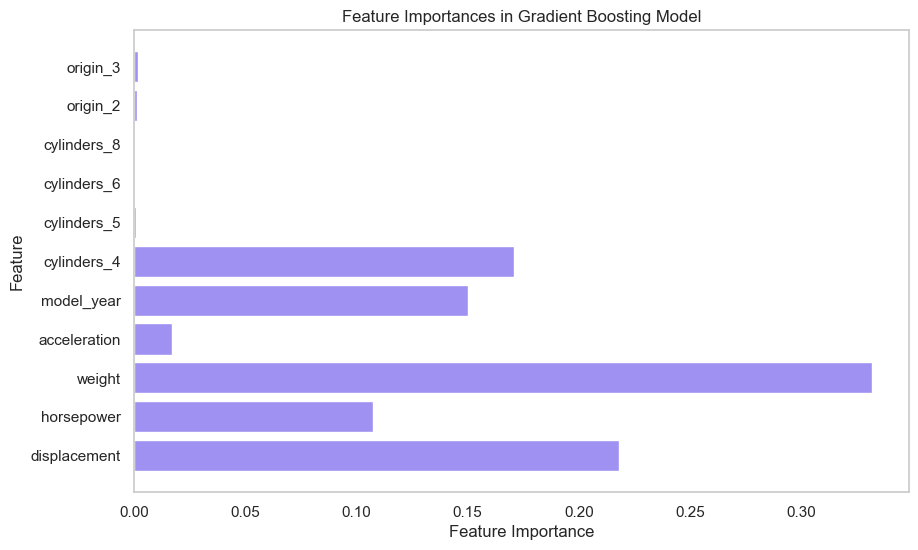

In [96]:
# getting feature importance
feature_importances_gb = best_gb_model.feature_importances_

# Plotting Feature Importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances_gb, color='#9E91F2')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Gradient Boosting Model')
plt.grid(False)
plt.show()

<a id="userinput"></a>
<div style="background-color: #90C376; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color: white; text-align: center; font-size:180%; margin: 0;">Step 12 | Prediction On User Input</h1>
  <span style="color: white;"></span>
</div>

⬆️ [Table of Contents](#contents_tabel)

In [97]:
def predict_mpg(features):
    # Define feature names
    feature_names = ['displacement', 'horsepower', 'weight', 'acceleration',
                     'model_year', 'cylinders', 'origin']

    # Create a dictionary mapping feature names to user input values
    user_input = dict(zip(feature_names, features))

    # Convert cylinders and origin to dummy variables
    cylinders = user_input['cylinders']
    origin = user_input['origin']

    # Initialize the dummy variables
    user_input['cylinders_4'] = 0
    user_input['cylinders_5'] = 0
    user_input['cylinders_6'] = 0
    user_input['cylinders_8'] = 0
    user_input['origin_2'] = 0
    user_input['origin_3'] = 0

    # Set the correct dummy variable for cylinders
    if cylinders in [4, 5, 6, 8]:
        user_input[f'cylinders_{cylinders}'] = 1
    
    # Set the correct dummy variable for origin
    if origin in [2, 3]:
        user_input[f'origin_{origin}'] = 1

    # Remove the original categorical columns
    user_input.pop('cylinders')
    user_input.pop('origin')

    # Create a DataFrame from the user input
    user_input_df = pd.DataFrame(user_input, index=[0])


    # Make a prediction using the model
    prediction = best_gb_model.predict(user_input_df)[0]
    
    return prediction

In [98]:
feature_widgets = {
    'displacement': widgets.FloatText(value=0.0, description='displacement:'),
    'horsepower': widgets.FloatText(value=0.0, description='horsepower:'),
    'weight': widgets.FloatText(value=0.0, description='weight:'),
    'acceleration': widgets.FloatText(value=0.0, description='acceleration:'),
    'model_year': widgets.FloatText(value=0.0, description='model_year:'),
    'cylinders': widgets.Dropdown(options=[4, 5, 6, 8], description='cylinders:'),
    'origin': widgets.Dropdown(options=[1, 2, 3], description='origin:'),
}

# Create a button for making predictions
predict_button = widgets.Button(description="Predict")

# Output widget to display prediction
output_widget = widgets.Output()

def on_button_click(b):
    
    a = [widget.value for widget in feature_widgets.values()]
    
    # Make prediction
    prediction = predict_mpg(a)
    
    # Display the prediction using IPython.display
    with output_widget:
        output_widget.clear_output()  # Clear previous output
        display(HTML(f"<b> Prediction is :</b> {prediction.round()} mpg "))

# Attach the button click event
predict_button.on_click(on_button_click)

# Display widgets and output area
display(*(widget for widget in feature_widgets.values()), predict_button, output_widget)


FloatText(value=0.0, description='displacement:')

FloatText(value=0.0, description='horsepower:')

FloatText(value=0.0, description='weight:')

FloatText(value=0.0, description='acceleration:')

FloatText(value=0.0, description='model_year:')

Dropdown(description='cylinders:', options=(4, 5, 6, 8), value=4)

Dropdown(description='origin:', options=(1, 2, 3), value=1)

Button(description='Predict', style=ButtonStyle())

Output()

<div style="background-color: #F23D3D; padding: 20px; border-radius: 10px; border: 2.5px solid #879E46;">
  <h1 style="color: white; text-align: center; font-size:180%; margin: 0;">Thank You</h1>
  <span style="color: white;"></span>
</div>

⬆️ [Table of Contents](#contents_tabel)